# APS106 - Fundamentals of Computer Programming
## Week 12 | Lecture 1 (12.2) - More Pandas, Data Visualization

### This Week
| Lecture | Topics |
| --- | --- |
| 12.1 | Pandas |
| **12.2** | **More Pandas, Data Visualization** | 
| 12.3 | Design Problem: Stock Market, Part 1 |

### Lecture Structure
1. [Conditional Selection](#section1)
2. [Breakout Session 1](#section2)
3. [Adding, Removing, and Modifying Columns](#section3)
4. [Utility Methods](#section4)
5. [String Methods](#section5)
6. [Breakout Session 2](#section6)
7. [Data Visualization](#section7)

<a id='section1'></a>
## 1. Conditional Selection
Let's start by importing `pandas`.

In [1]:
import pandas as pd

Now, let's import a new dataset of baby names in New York.

In [2]:
babynames = pd.read_csv('new_york_baby_names.csv')
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


That way to read the table able is as follows. In the state of Ney York in 1910, 1923 babies of Female sex were born and given the name Mary.

Let's start off by grabbing a smaller sample of our dataset.

In [5]:
babynames_first_10_rows = babynames.loc[[0, 12, 3], :]
babynames_first_10_rows

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
5,NY,F,1910,Dorothy,897
6,NY,F,1910,Ruth,713
7,NY,F,1910,Lillian,648
8,NY,F,1910,Florence,604
9,NY,F,1910,Frances,589


By passing in a sequence (`list` or `Series`) of `boolean` values, we can extract a subset of the rows in a `DataFrame`. We will keep only the rows that correspond to a `boolean` value of `True`.

Let's first create a list of `booleans`. One requirement is that if we're created a list to filer the rows of a `DataFrame` then the `list` must have as many items in it as there are rows in the `DataFrame` we wantto filter. In this case, the `DataFrame` has **10** rows so the list must have **10** booleans.

In [6]:
boolean_list = [True, False, True, False, True, False, True, False, True, False]

Now, let's pass that list in as the first argument (row selection) in for the `.loc` method.

In [7]:
babynames_first_10_rows.loc[boolean_list, :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
2,NY,F,1910,Rose,990
4,NY,F,1910,Margaret,926
6,NY,F,1910,Ruth,713
8,NY,F,1910,Florence,604


As you can see above, we had placed `True` at the position of all even indices in the `list` and therefore, only rows with an even index are returned.

Oftentimes, we'll use boolean selection to check for entries in a `DataFrame` that meet a particular condition. In the code below, we first selectiong a column, which returns a `Series`.

In [8]:
babynames.loc[:, 'Sex']

0         F
1         F
2         F
3         F
4         F
         ..
314088    M
314089    M
314090    M
314091    M
314092    M
Name: Sex, Length: 314093, dtype: object

In the code below, we are using a logical condition to generate a boolean `Series`. 

In [9]:
babynames.loc[:, 'Sex'] == "F"

0          True
1          True
2          True
3          True
4          True
          ...  
314088    False
314089    False
314090    False
314091    False
314092    False
Name: Sex, Length: 314093, dtype: bool

Let's save this as a variable.

In [14]:
boolean_series = babynames.loc[:, 'Sex'] == "F"

Now we can pass this `boolean` `Series` into `.loc` as the first argument (row selection). This will return a `DataFrame` where only the Female baby names will be returned.

In [15]:
babynames.loc[boolean_series, :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
178835,NY,F,2022,Zella,5
178836,NY,F,2022,Zen,5
178837,NY,F,2022,Ziah,5
178838,NY,F,2022,Zinnia,5


As you can see from the print out above, only Female baby names are present in the resultant `DataFrame`. Let's check out the size of the original `DataFrame` and the one after select for only `sex == Female` baby names.

In [17]:
total_rows = babynames.shape[0]
female_rows = babynames.loc[boolean_series, :].shape[0]

print("The original DataFrame has: ", total_rows, " rows.", sep='')
print("The 'Female' filtered DataFrame has: ", female_rows, " rows.", sep='')

The original DataFrame has: 314093 rows.
The 'Female' filtered DataFrame has: 178840 rows.


Rather than creating a separate variable `boolean_series` for the `boolean` `Series`, we can pass the logical condition into `.loc` as the first argument (row selection).

In [19]:
babynames.loc[babynames.loc[:, 'Sex'] == "M", :]

,State,Sex,Year,Name,Count
178840,NY,M,1910,John,1125
178841,NY,M,1910,Joseph,917
178842,NY,M,1910,William,768
178843,NY,M,1910,James,592
178844,NY,M,1910,Charles,528
...,...,...,...,...,...
314088,NY,M,2022,Zephyr,5
314089,NY,M,2022,Zeus,5
314090,NY,M,2022,Zishe,5
314091,NY,M,2022,Zorawar,5


Lastly, let's show that the number of rows for the `sex == Female` `DataFrame` and the `sex == Male` `DataFrame` add up to the original size of the `babynames` `DataFrame`.

In [20]:
total_rows = babynames.shape[0]
female_rows = babynames.loc[babynames.loc[:, 'Sex'] == "F", :].shape[0] 
male_rows = babynames.loc[babynames.loc[:, 'Sex'] == "M", :].shape[0] 

print("The original DataFrame has: ", total_rows, " rows.", sep='')
print("The 'Female' filtered DataFrame has: ", female_rows, " rows.", sep='')
print("The 'Male' filtered DataFrame has: ", male_rows, " rows.", sep='')
print(female_rows, " + ", male_rows, " = ", total_rows, sep='')

The original DataFrame has: 314093 rows.
The 'Female' filtered DataFrame has: 178840 rows.
The 'Male' filtered DataFrame has: 135253 rows.
178840 + 135253 = 314093


### Multiple Conditions
To filter on multiple conditions, we combine boolean operators using bitwise comparisons and use brackets `()` to separate the conditions.

| Symbol | Usage | Meaning |
| --- | --- | --- |
| ~ | ~p | not p |
| &#124; | p &#124; q | p or q |
| & | p & q | p and q |

The code below is filtering the `babynames` `DataFrame` to only include **Female** baby names for all years before the year **2000**.

In [21]:
babynames.loc[(babynames.loc[:, "Sex"] == "F") & (babynames.loc[:, "Year"] < 2000), :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
121260,NY,F,1999,Yusra,5
121261,NY,F,1999,Zaira,5
121262,NY,F,1999,Zakiyyah,5
121263,NY,F,1999,Zaniya,5


The code below is filtering the `babynames` `DataFrame` to include all baby names that are either **Female** or from before the year **2000**.

In [22]:
babynames.loc[(babynames.loc[:, "Sex"] == "F") | (babynames.loc[:, "Year"] < 2000), :]

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
267531,NY,M,1999,Yiannis,5
267532,NY,M,1999,Zaid,5
267533,NY,M,1999,Zavier,5
267534,NY,M,1999,Zavion,5


The code below is filtering the `babynames` `DataFrame` to include **Female** baby names from the year **2000** that were given to less than **6** babies that year.

In [23]:
babynames.loc[(babynames.loc[:, "Sex"] == "M") & 
              (babynames.loc[:, "Year"] == 2020) & 
              (babynames.loc[:, "Count"] < 6), :]

,State,Sex,Year,Name,Count
309726,NY,M,2020,Abdirahman,5
309727,NY,M,2020,Abdurahman,5
309728,NY,M,2020,Abubakar,5
309729,NY,M,2020,Adil,5
309730,NY,M,2020,Adonnis,5
...,...,...,...,...,...
309955,NY,M,2020,Zac,5
309956,NY,M,2020,Zach,5
309957,NY,M,2020,Zacharias,5
309958,NY,M,2020,Zayvion,5


The code below is filtering the `babynames` `DataFrame` to include **Female** baby names from the year **2000** that were given to more than **700** babies that year.

In [24]:
babynames.loc[(babynames.loc[:, "Sex"] == "M") & 
              (babynames.loc[:, "Year"] == 2020) & 
              (babynames.loc[:, "Count"] > 700), :]

,State,Sex,Year,Name,Count
308011,NY,M,2020,Liam,1360
308012,NY,M,2020,Noah,1236
308013,NY,M,2020,Lucas,913
308014,NY,M,2020,Jacob,879
308015,NY,M,2020,Joseph,819
308016,NY,M,2020,Ethan,803
308017,NY,M,2020,Michael,784
308018,NY,M,2020,Benjamin,731
308019,NY,M,2020,James,708


### Membership Condition
We can use `.isin` for Selection based on a list or Series. For example, let's way we wantto create a dictionary that only contains the names `"Sebastian"`, `"Ben"`, `"Joseph"`, `"Katia"`, and `"Tamara"`. Based on what we've learned so far, I could do the following.

In [25]:
if 'seb' in ['seb', 'ben']:
    print(True)

True


In [26]:
babynames.loc[(babynames.loc[:, "Name"] == "Sebastian") |
              (babynames.loc[:, "Name"] == "Ben") |
              (babynames.loc[:, "Name"] == "Joseph") |
              (babynames.loc[:, "Name"] == "Katia") |
              (babynames.loc[:, "Name"] == "Tamara"), :]

,State,Sex,Year,Name,Count
862,NY,F,1911,Joseph,6
2456,NY,F,1914,Joseph,9
3084,NY,F,1915,Joseph,12
3828,NY,F,1916,Joseph,11
4522,NY,F,1917,Joseph,15
...,...,...,...,...,...
309992,NY,M,2021,Sebastian,443
310553,NY,M,2021,Ben,25
312024,NY,M,2022,Joseph,731
312046,NY,M,2022,Sebastian,475


A more concise method to achieve the above is by using the `.isin` method. The .`isin` method in Pandas is used to check whether each element in a `DataFrame` or `Series` is contained in a sequence of values. Here's how it works:

In [27]:
names = ["Sebastian", "Ben", "Joseph", "Katia", "Tamara"]
babynames.loc[:, "Name"].isin(names)

0         False
1         False
2         False
3         False
4         False
          ...  
314088    False
314089    False
314090    False
314091    False
314092    False
Name: Name, Length: 314093, dtype: bool

We get back a `Series` where the value is `True` if the `"Name"` is in the list `names` and `False` if its not. We can take this `boolean` `Series` and pass it to the first argument the `.loc` method (row selection).

In [28]:
names = ["Sebastian", "Ben", "Joseph", "Katia", "Tamara"]
babynames.loc[babynames.loc[:, "Name"].isin(names), :]

,State,Sex,Year,Name,Count
862,NY,F,1911,Joseph,6
2456,NY,F,1914,Joseph,9
3084,NY,F,1915,Joseph,12
3828,NY,F,1916,Joseph,11
4522,NY,F,1917,Joseph,15
...,...,...,...,...,...
309992,NY,M,2021,Sebastian,443
310553,NY,M,2021,Ben,25
312024,NY,M,2022,Joseph,731
312046,NY,M,2022,Sebastian,475


<a id='section2'></a>
## 2. Breakout Session 1
Let's import the `elections` and `babynames` datasets.

In [29]:
elections = pd.read_csv('elections.csv')
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [30]:
babynames = pd.read_csv('new_york_baby_names.csv')
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


#### Question 1
Display a `DataFrame` showing all **Republican** candidates who won the presidential election with less than **50%** of the popular vote.

In [32]:
elections.loc[(elections.loc[:, 'Party'] == 'Republican') & 
              (elections.loc[:, 'Result'] == 'win') & 
              (elections.loc[:, '%'] < 50), :]

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
33,1876,Rutherford Hayes,Republican,4034142,win,48.471624
36,1880,James Garfield,Republican,4453337,win,48.369234
43,1888,Benjamin Harrison,Republican,5443633,win,47.858041
117,1968,Richard Nixon,Republican,31783783,win,43.565246
152,2000,George W. Bush,Republican,50456002,win,47.974666
173,2016,Donald Trump,Republican,62984828,win,46.407862


#### Question 2
Display a `DataFrame` showing all years where the following parties ran: `'Green'`, `'Union Labor'`, and `'Free Soil'`.

In [33]:
elections.loc[(elections.loc[:, 'Party'].isin(['Green', 'Union Labor', 'Free Soil'])), :]

,Year,Candidate,Party,Popular vote,Result,%
15,1848,Martin Van Buren,Free Soil,291501,loss,10.138474
18,1852,John P. Hale,Free Soil,155210,loss,4.930283
42,1888,Alson Streeter,Union Labor,146602,loss,1.288861
149,1996,Ralph Nader,Green,685297,loss,0.712721
155,2000,Ralph Nader,Green,2882955,loss,2.741176
156,2004,David Cobb,Green,119859,loss,0.098088
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
170,2012,Jill Stein,Green,469627,loss,0.365199
177,2016,Jill Stein,Green,1457226,loss,1.073699
181,2020,Howard Hawkins,Green,405035,loss,0.255731


#### Question 3
The `elections` `DataFrame` is in chronological order when imported. Building on the `DataFrame` from **Question 1**, print the name of the first **Republican** candidate to win the presidential election with less than **50%** of the popular vote.

In [34]:
elections.loc[(elections.loc[:, 'Party'] == 'Republican') & \
                        (elections.loc[:, 'Result'] == 'win') & \
                        (elections.loc[:, '%'] < 50), :]

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
33,1876,Rutherford Hayes,Republican,4034142,win,48.471624
36,1880,James Garfield,Republican,4453337,win,48.369234
43,1888,Benjamin Harrison,Republican,5443633,win,47.858041
117,1968,Richard Nixon,Republican,31783783,win,43.565246
152,2000,George W. Bush,Republican,50456002,win,47.974666
173,2016,Donald Trump,Republican,62984828,win,46.407862


In [36]:
df_temp = elections.loc[(elections.loc[:, 'Party'] == 'Republican') & \
                        (elections.loc[:, 'Result'] == 'win') & \
                        (elections.loc[:, '%'] < 50), :]

candidates_name = df_temp.iloc[-1, 1]

print(candidates_name, 'is was first Republican candidate to win the presidential election with less than **50%** of the popular vote.')

Donald Trump is was first Republican candidate to win the presidential election with less than **50%** of the popular vote.


#### Question 4
Display a `DataFrame` showing all **Republican** and **Democratic** candidates who won the presidential election with less than **50%** of the popular vote.

In [37]:
elections.loc[(elections.loc[:, 'Party'].isin(['Democratic', 'Republican'])) & 
              (elections.loc[:, 'Result'] == 'win') & 
              (elections.loc[:, '%'] < 50), :]

,Year,Candidate,Party,Popular vote,Result,%
20,1856,James Buchanan,Democratic,1835140,win,45.306080
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
33,1876,Rutherford Hayes,Republican,4034142,win,48.471624
36,1880,James Garfield,Republican,4453337,win,48.369234
39,1884,Grover Cleveland,Democratic,4914482,win,48.884933
43,1888,Benjamin Harrison,Republican,5443633,win,47.858041
47,1892,Grover Cleveland,Democratic,5553898,win,46.121393
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
74,1916,Woodrow Wilson,Democratic,9126868,win,49.367987
100,1948,Harry Truman,Democratic,24179347,win,49.601536


#### Question 5
Display a `DataFrame` showing all years where the name **Sebastian** was given to at leat one baby **Male** baby.

In [38]:
babynames.loc[(babynames.loc[:, 'Name'] == 'Sebastian') & (babynames.loc[:, 'Sex'] == 'M') , :]

,State,Sex,Year,Name,Count
179332,NY,M,1911,Sebastian,11
179710,NY,M,1912,Sebastian,17
180162,NY,M,1913,Sebastian,21
180625,NY,M,1914,Sebastian,35
181213,NY,M,1915,Sebastian,36
...,...,...,...,...,...
303936,NY,M,2018,Sebastian,571
305980,NY,M,2019,Sebastian,543
308043,NY,M,2020,Sebastian,437
309992,NY,M,2021,Sebastian,443


#### Bonus
We'll discuss plotting a bit later in the lecture but for now, check this out.

<Axes: xlabel='Year'>

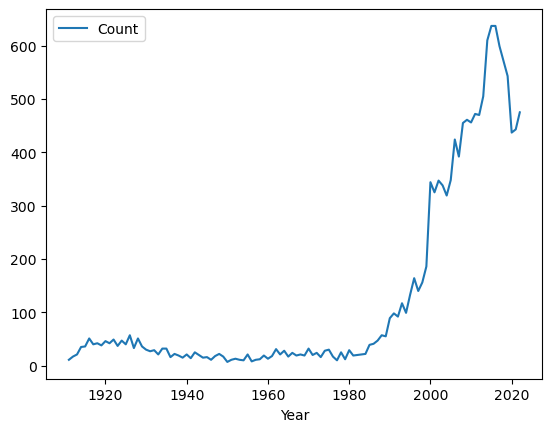

In [39]:
babynames.loc[(babynames.loc[:, 'Name'] == 'Sebastian') & (babynames.loc[:, 'Sex'] == 'M') , :].plot(kind='line', x='Year', y='Count')

<a id='section3'></a>
## 3. Adding, Removing, and Modifying Columns
### Add a Column
To add a column, use `.loc[, column-name]` to reference the desired new column, then assign it to a `Series` or `list` of appropriate length. Let's create a new column to the `babynames` `DataFrame` called `"Dummy"` and assigned zeros to it.

In [40]:
babynames.loc[:,  "Dummy"] = 0
babynames

,State,Sex,Year,Name,Count,Dummy
0,NY,F,1910,Mary,1923,0
1,NY,F,1910,Helen,1290,0
2,NY,F,1910,Rose,990,0
3,NY,F,1910,Anna,951,0
4,NY,F,1910,Margaret,926,0
...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,5,0
314089,NY,M,2022,Zeus,5,0
314090,NY,M,2022,Zishe,5,0
314091,NY,M,2022,Zorawar,5,0


Now, let's try creating a new column called `"Count_Squared"` and assign to it the square of the `"Count"` column.

In [41]:
babynames.loc[:,  "Count_Squared"] = babynames.loc[:,  "Count"] * babynames.loc[:,  "Count"]
babynames

,State,Sex,Year,Name,Count,Dummy,Count_Squared
0,NY,F,1910,Mary,1923,0,3697929
1,NY,F,1910,Helen,1290,0,1664100
2,NY,F,1910,Rose,990,0,980100
3,NY,F,1910,Anna,951,0,904401
4,NY,F,1910,Margaret,926,0,857476
...,...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,5,0,25
314089,NY,M,2022,Zeus,5,0,25
314090,NY,M,2022,Zishe,5,0,25
314091,NY,M,2022,Zorawar,5,0,25


### Modify a Column
To modify a column, use `.loc[:, column-name]` to access the desired column, then re-assign it to a new `list` or `Series`.

In [42]:
x = 2

x = x + 1

x

3

In [43]:
babynames.loc[:, "Count"] = babynames.loc[:, "Count"] - 10000
babynames

,State,Sex,Year,Name,Count,Dummy,Count_Squared
0,NY,F,1910,Mary,-8077,0,3697929
1,NY,F,1910,Helen,-8710,0,1664100
2,NY,F,1910,Rose,-9010,0,980100
3,NY,F,1910,Anna,-9049,0,904401
4,NY,F,1910,Margaret,-9074,0,857476
...,...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,-9995,0,25
314089,NY,M,2022,Zeus,-9995,0,25
314090,NY,M,2022,Zishe,-9995,0,25
314091,NY,M,2022,Zorawar,-9995,0,25


### Rename a Column Name
Rename a column using the `.rename(old-column-name:new-column-name)` method.

In [44]:
babynames = babynames.rename(columns={"Name":"First-Name"})
babynames

,State,Sex,Year,First-Name,Count,Dummy,Count_Squared
0,NY,F,1910,Mary,-8077,0,3697929
1,NY,F,1910,Helen,-8710,0,1664100
2,NY,F,1910,Rose,-9010,0,980100
3,NY,F,1910,Anna,-9049,0,904401
4,NY,F,1910,Margaret,-9074,0,857476
...,...,...,...,...,...,...,...
314088,NY,M,2022,Zephyr,-9995,0,25
314089,NY,M,2022,Zeus,-9995,0,25
314090,NY,M,2022,Zishe,-9995,0,25
314091,NY,M,2022,Zorawar,-9995,0,25


### Delete a Column
Remove a column using `.drop()`.

In [45]:
babynames = babynames.drop(["Dummy", "Count_Squared"], axis="columns")
babynames

,State,Sex,Year,First-Name,Count
0,NY,F,1910,Mary,-8077
1,NY,F,1910,Helen,-8710
2,NY,F,1910,Rose,-9010
3,NY,F,1910,Anna,-9049
4,NY,F,1910,Margaret,-9074
...,...,...,...,...,...
314088,NY,M,2022,Zephyr,-9995
314089,NY,M,2022,Zeus,-9995
314090,NY,M,2022,Zishe,-9995
314091,NY,M,2022,Zorawar,-9995


In [46]:
babynames = babynames.drop([0, 2], axis="rows")
babynames

,State,Sex,Year,First-Name,Count
1,NY,F,1910,Helen,-8710
3,NY,F,1910,Anna,-9049
4,NY,F,1910,Margaret,-9074
5,NY,F,1910,Dorothy,-9103
6,NY,F,1910,Ruth,-9287
...,...,...,...,...,...
314088,NY,M,2022,Zephyr,-9995
314089,NY,M,2022,Zeus,-9995
314090,NY,M,2022,Zishe,-9995
314091,NY,M,2022,Zorawar,-9995


<a id='section4'></a>
## 4. Utility Methods
There are many, many utility methods built into `Pandas`, far more than we can possibly cover in `APS106`. You are encouraged to explore all the functionality outlined in the pandas documentation. For `APS106`, you will only be required to know the utility methods covered in this lecture.

In [47]:
babynames = pd.read_csv('new_york_baby_names.csv')
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


### `.max()`
This function returns the maximum value along the specified axis. As shown below, `axis=0` is column-wise and `axis=1` is row-wise.

<br>
<img src="images/DataFrame.png" alt="drawing" width="450"/>
<br>

For a `Series`.
```python
df['column_name'].min()
```

For a `DataFrame`, for column-wise calculation:
```python
df.min(axis=0)
```
or, for a row-wise calculation:
```python
df.min(axis=1)
```

First, let's try calculating the maximum baby name count. As you can see, because `Series` is 1-D data, we do not need to specify the axis.

In [48]:
babynames.loc[:, 'Count'].max()

10027

For a `DataFrame`, if we use a column-wise operation, Pandas will return the maximum value for each column.

In [49]:
babynames.max(axis=0)

State       NY
Sex          M
Year      2022
Name      Zyra
Count    10027
dtype: object

If we use a row-wise operation, Pandas will try to return the maximum value for each row.

In [50]:
babynames.max(axis=1)

TypeError: '>=' not supported between instances of 'str' and 'int'

As you can see, we get an error because Pandas cannot compare numberic and string data to determine which is larger. If we filter to only the numeric columns (`"Year"` and `"Count"`), then this should work. You can see that the `"Year"` is returned because its typically larger than the name count.

In [53]:
babynames.loc[:, ['Year', 'Count']].max(axis=1)

0         1923
1         1910
2         1910
3         1910
4         1910
          ... 
314088    2022
314089    2022
314090    2022
314091    2022
314092    2022
Length: 314093, dtype: int64

### `.min()`
This function returns the minimum value along the specified axis.

In [54]:
babynames.loc[:, ['Year', 'Count']].min(axis=1)

0         1910
1         1290
2          990
3          951
4          926
          ... 
314088       5
314089       5
314090       5
314091       5
314092       5
Length: 314093, dtype: int64

### `.mean()`
This function computes the arithmetic mean along the specified axis.

In [55]:
babynames.loc[:, 'Count'].mean()

80.66585692772523

### `.value_counts()`
Count the number of times each unique value occurs in a `Series`. The output below is a `Series` where the `index` are all the unique names in the `babynames` `DataFrame` and the `values` are the total number of babies with those names.

In [56]:
babynames.loc[:, "Name"].value_counts()

Name
Jean       217
Carmen     216
Lee        208
Joseph     204
Francis    204
          ... 
Mi           1
Liandra      1
Quint        1
Lavasia      1
Zealand      1
Name: count, Length: 15165, dtype: int64

### `.unique()`
Return an array of all unique values in a `Series`. Below, we apply the `.unique()` method to the `Name` `Series` and get an array of all unique baby names in the `babynames` dataset. For the purpose of `APS106`, you can treat this array as a list-like object. It is mutable, indexable, and iterable. 

In [58]:
len(babynames.loc[:, "Name"].unique())

15165

### `.sort_values()`
The `.sort_values()` function in `Pandas` is used to sort a `DataFrame` or `Series` by one or more columns. It allows you to specify the column(s) by which you want to sort the data, as well as the order of sorting (ascending or descending).

The code below sorts the `Name` `Series` in ascending order.

In [60]:
babynames.loc[:, "Name"].sort_values(ascending=False)

178502     Zyra
173987     Zyra
295339     Zyon
288372     Zyon
308991     Zyon
          ...  
296542    Aaden
305344    Aaden
307526    Aadam
295142    Aaban
297225    Aaban
Name: Name, Length: 314093, dtype: object

The code below sorts a `DataFrame` by the `Count` column in descending order.

In [63]:
babynames.sort_values(by="Count", ascending=True).head()

,State,Sex,Year,Name,Count
314092,NY,M,2022,Zubair,5
85627,NY,F,1983,Skye,5
85626,NY,F,1983,Shona,5
85625,NY,F,1983,Shevonne,5
85624,NY,F,1983,Sheron,5


The code below sorts a `DataFrame` first by the `"Year"` in ascending order and then by the `"Count"` in descending order.

In [65]:
babynames.sort_values(by=["Year", "Count"], ascending=[True, False]).head(30)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
178840,NY,M,1910,John,1125
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
178841,NY,M,1910,Joseph,917
5,NY,F,1910,Dorothy,897
178842,NY,M,1910,William,768
6,NY,F,1910,Ruth,713


### `.astype()`
The `.astype()` function is used to cast a pandas object (like a `DataFrame` or a `Series`) to a specified dtype (data type). It allows you to explicitly convert the data to a desired data type.

Let's say you have a `DataFrame` where one of the columns represents numerical values as strings, and you want to convert this column to numeric data type for numerical operations. Here's a simple example of how you can use `.astype()` to achieve this.

First, let's create the `DataFrame`.

In [66]:
data = {'NumericString': ['1', '2', '3', '4', '5']}
df = pd.DataFrame(data)
df

,NumericString
0,1
1,2
2,3
3,4
4,5


Now let's check the data type of the `'NumericString'` column.

In [70]:
print("Data types before conversion:")
print(df.dtypes)

Data types before conversion:
NumericString    object
dtype: object


Lastly, let's convert the data type of the `'NumericString'` column from a `string` to an `int`.

In [71]:
df.loc[:, 'NumericString'] = df.loc[:, 'NumericString'].astype(int)
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
NumericString    object
dtype: object


<a id='section5'></a>
## 5. String Methods
The Pandas library is very useful for the manipulation of strings as it provides us with various handy string methods. It saves time and makes our program efficient. The following are `string` methods we will cover in APS106.
1. `.upper()`
2. `.lower()`
3. `.len()`
4. `.startswith()` / `.endswith()`
5. `.replace()`

### `.upper()`
This `string` method converts a `string` into uppercase as you can see from the example below.

In [72]:
babynames.loc[:, 'Name'].str.upper()

0             MARY
1            HELEN
2             ROSE
3             ANNA
4         MARGARET
            ...   
314088      ZEPHYR
314089        ZEUS
314090       ZISHE
314091     ZORAWAR
314092      ZUBAIR
Name: Name, Length: 314093, dtype: object

`string` method opperator on `Series` NOT `DataFrames`. Notice the error when I try to call a `string` method from a `DataFrame`.

In [73]:
babynames.str.upper()

AttributeError: 'DataFrame' object has no attribute 'str'

Additionally, we need to access `string` methods via the `.str` module. 

1. `Series.str.upper()`
2. `Series.str.lower()`
3. `Series.str.len()`
4. `Series.str.startswith()`
5. `Series.str.replace()`

### `.lower()`
This `string` method converts a `string` into lowercase as you can see from the example below.

In [74]:
babynames.loc[:, 'Name'].str.lower()

0             mary
1            helen
2             rose
3             anna
4         margaret
            ...   
314088      zephyr
314089        zeus
314090       zishe
314091     zorawar
314092      zubair
Name: Name, Length: 314093, dtype: object

### `.len()`
This `string` method returns the length (number of characters) of each `string`. This would be similar to:

```python
>>> var = 'seb'
>>> print(len(var))
3
```

In [75]:
babynames.loc[:, 'Name'].str.len()

0         4
1         5
2         4
3         4
4         8
         ..
314088    6
314089    4
314090    5
314091    7
314092    6
Name: Name, Length: 314093, dtype: int64

### `.startswith()` / `.endswith()`
`.startswith()` returns a `boolean` which is `True` if the `string` in the `Series` starts with the `string` that is passed as an argument to `.startswith()`. `.endswith()` returns a `boolean` which is `True` if the `string` in the `Series` ends with the `string` that is passed as an argument to `.endswith()`. 

Let's check out the first 5 rows of our `babynames` `DataFrame`.

In [76]:
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


We can see that the first name is `Mary` and the fifth row is `Margaret`. Therefore, if we use `.startswith('M')`, we should get `True` for rows 0 and 4 and `False` for rows 1 - 3.

In [79]:
babynames.loc[:, 'Name'].str.endswith('B')

0         False
1         False
2         False
3         False
4         False
          ...  
314088    False
314089    False
314090    False
314091    False
314092    False
Name: Name, Length: 314093, dtype: bool

### `.replace()`
Replaces a part of the string with another one. This works in a similar way to the Python string method `.replace()`. The `.replace()` takes two arguments: (1) The `string` to replace and (2) What `string` to replace it with.

Let's consider a scenario where you have a `DataFrame` containing a column with strings representing monetary values, but some of these values are formatted with commas as thousands separators. You want to clean up the data by removing the commas from these values so that you can convert them to numerical values for analysis.

Here's how you can use `str.replace()` from Pandas to achieve this. First, let's create the `DataFrame`.

In [80]:
data = {'MonetaryValue': ['$1,000', '$2,500', '$3,750', '$4,500', '$5,250']}
df = pd.DataFrame(data)
df

,MonetaryValue
0,"$1,000"
1,"$2,500"
2,"$3,750"
3,"$4,500"
4,"$5,250"


Now, let's use `.replace()` to replace the comma `","` with an empty space `""`.

In [81]:
df.loc[:, 'MonetaryValue'] = df.loc[:, 'MonetaryValue'].str.replace(',', '')
df

,MonetaryValue
0,$1000
1,$2500
2,$3750
3,$4500
4,$5250


Next, let's use `.replace()` to replace the dollar sign `"$"` with an empty space `""`.

In [82]:
df.loc[:, 'MonetaryValue'] = df.loc[:, 'MonetaryValue'].str.replace('$', '')
df

,MonetaryValue
0,1000
1,2500
2,3750
3,4500
4,5250


Now we can use `.astype()` to convert from a `string` to a `float` so we can apply mathematical operations to the column `"MonetaryValue"`.

In [83]:
df.loc[:, 'MonetaryValue'] = df.loc[:, 'MonetaryValue'].astype(float)
df

,MonetaryValue
0,1000.0
1,2500.0
2,3750.0
3,4500.0
4,5250.0


<a id='section6'></a>
## 6. Breakout Session 2
For this Breakout Session, we will be working with the `babynames` dataset so let's load it again.

In [92]:
babynames = pd.read_csv('new_york_baby_names.csv')
babynames.head()

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


### Question 1
Create a new `DataFrame` called `babynames_1985` that only includes baby names from the year 1985.

In [93]:
babynames_1985 = babynames.loc[babynames.loc[:, 'Year'] == 1985, :]
babynames_1985.head()

,State,Sex,Year,Name,Count
87581,NY,F,1985,Jessica,3238
87582,NY,F,1985,Jennifer,3228
87583,NY,F,1985,Nicole,2168
87584,NY,F,1985,Amanda,2121
87585,NY,F,1985,Ashley,1736


### Question 2
Remove all names from `babynames_1985` that do not start with the letter `"J"`.

In [94]:
babynames_1985 = babynames_1985.loc[babynames.loc[:, 'Name'].str.startswith('J'), :]
babynames_1985.head()

,State,Sex,Year,Name,Count
87581,NY,F,1985,Jessica,3238
87582,NY,F,1985,Jennifer,3228
87614,NY,F,1985,Jamie,591
87617,NY,F,1985,Jacqueline,532
87622,NY,F,1985,Jenna,493


### Question 3
Add a column to `babynames_1985` called `"length"` that contains the length of `"Name"` (the number of letters in the name). For example, the length of `"Seb"` is **3**.

In [96]:
babynames_1985.loc[:, 'length'] = babynames.loc[:, 'Name'].str.len()
babynames_1985.head()

,State,Sex,Year,Name,Count,length
87581,NY,F,1985,Jessica,3238,7
87582,NY,F,1985,Jennifer,3228,8
87614,NY,F,1985,Jamie,591,5
87617,NY,F,1985,Jacqueline,532,10
87622,NY,F,1985,Jenna,493,5


### Question 4
Sort `babynames_1985` by the `"length"` column so that the first row contains the longest name starting with `"J"` from 1985.

In [97]:
babynames_1985 = babynames_1985.sort_values(by='length', ascending=False)
babynames_1985.head()

,State,Sex,Year,Name,Count,length
243801,NY,M,1985,Jonmichael,7,10
87617,NY,F,1985,Jacqueline,532,10
244047,NY,M,1985,Janmichael,5,10
88515,NY,F,1985,Jeanmarie,12,9
89382,NY,F,1985,Jacquelin,5,9


### Question 5
Filter `babynames_1985` to only include names that end with `"ette"` and have **8** or more letters.

In [99]:
babynames_1985.loc[(babynames_1985.loc[:, 'Name'].str.endswith('ette')) & 
                   (babynames_1985.loc[:, 'length'] >= 8), :]
babynames_1985.head()

,State,Sex,Year,Name,Count,length
243801,NY,M,1985,Jonmichael,7,10
87617,NY,F,1985,Jacqueline,532,10
244047,NY,M,1985,Janmichael,5,10
88515,NY,F,1985,Jeanmarie,12,9
89382,NY,F,1985,Jacquelin,5,9


### Question 6 (Bonus)
Starting with `babynames_1985` below.

In [ ]:
babynames_1985 = babynames.loc[babynames.loc[:, 'Year'] == 1985, :]
babynames_1985.head()

Remove all names from `babynames_1985` that do not start with the letter `"J"` WITHOUT using Pandas `.str` methods.

In [ ]:
starts_with_j = []

for index in babynames_1985.index:
    
    name = babynames_1985.loc[index, 'Name']
    
    if name[0] == 'J':
        starts_with_j.append(True)
    else:
        starts_with_j.append(False)
        
babynames_1985 = babynames_1985.loc[starts_with_j, :]
babynames_1985.head()

<a id='section7'></a>
## 7. Data Visualization
There are MANY plotting libraries available in the Python ecosystem and doing a deep dive into them is way beyong the scope of APS106. However, Pandas has some basic plotting functionality we will cover. In particular, we will cover `line plots`, `scatter plots`, and `bar plot`.

First let's create a dummy dataset to demonstrate these plotting functions.

In [100]:
data = {'A': [1, 2, 3, 4, 5],
        'B': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)
df

,A,B
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


### Line Plot

<Axes: xlabel='A'>

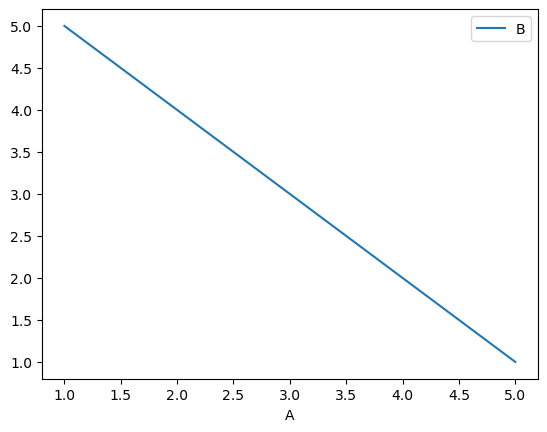

In [101]:
df.plot(kind='line', x='A', y='B')

### Scatter Plot

<Axes: xlabel='A', ylabel='B'>

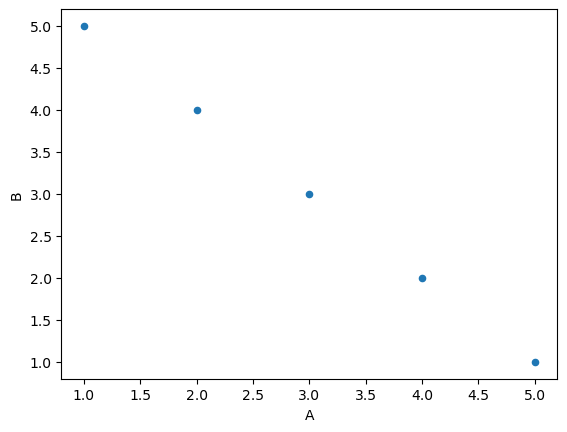

In [102]:
df.plot(kind='scatter', x='A', y='B')

### Bar Plot

<Axes: xlabel='A'>

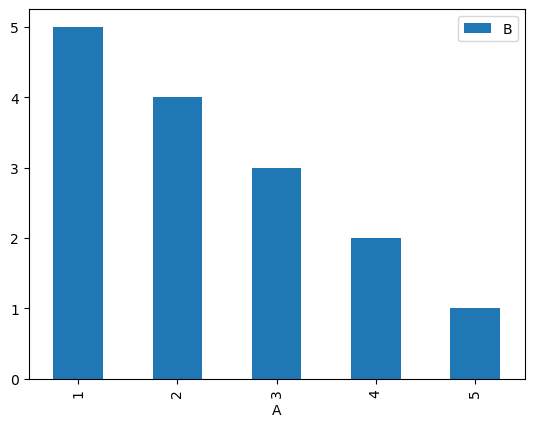

In [103]:
df.plot(kind='bar', x='A', y='B')

### Example 1: Uber Rides

In [104]:
combined_uber_data = pd.read_csv('combined_uber_data.csv')
combined_uber_data.head()

,Date/Time,count
0,2014-04-06,112401
1,2014-04-13,123324
2,2014-04-20,115698
3,2014-04-27,138532
4,2014-05-04,158323


<Axes: title={'center': 'Uber Rides Per Week, 2014'}, xlabel='Date/Time'>

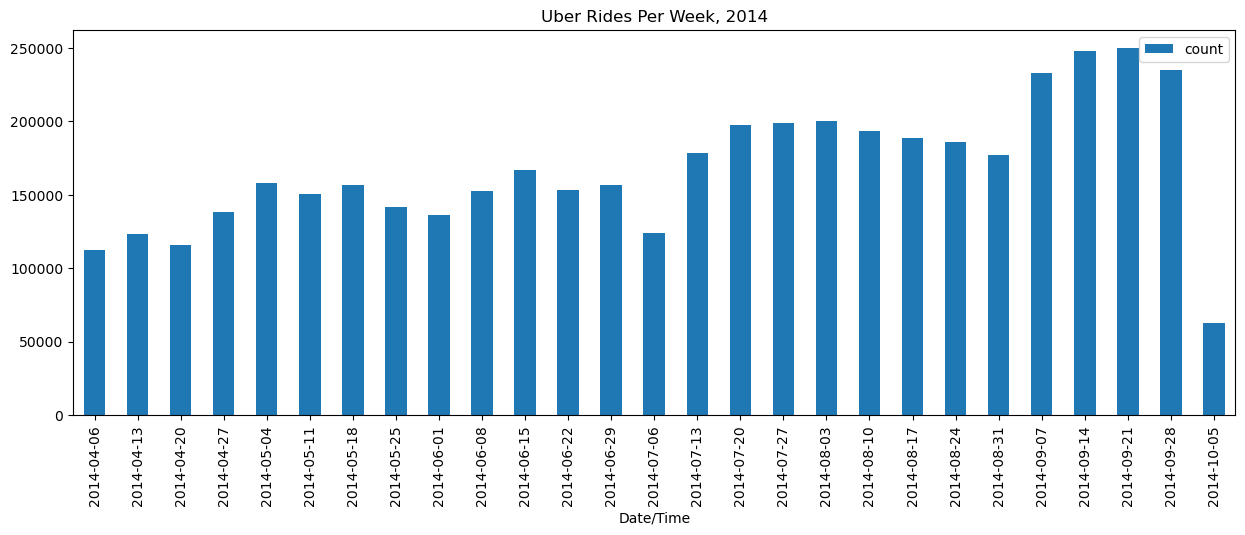

In [105]:
combined_uber_data.plot(kind='bar', x='Date/Time', y='count', figsize=(15, 5), title='Uber Rides Per Week, 2014')

### Example 2: Toronto Weather

In [106]:
toronto_weather_data = pd.read_csv('toronto_weather_data.csv')
toronto_weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C)
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,0:00,1.5
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1:00,1.5
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,2:00,1.0
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,3:00,1.2
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,4:00,1.3


<Axes: title={'center': 'Temperature in Toronto'}>

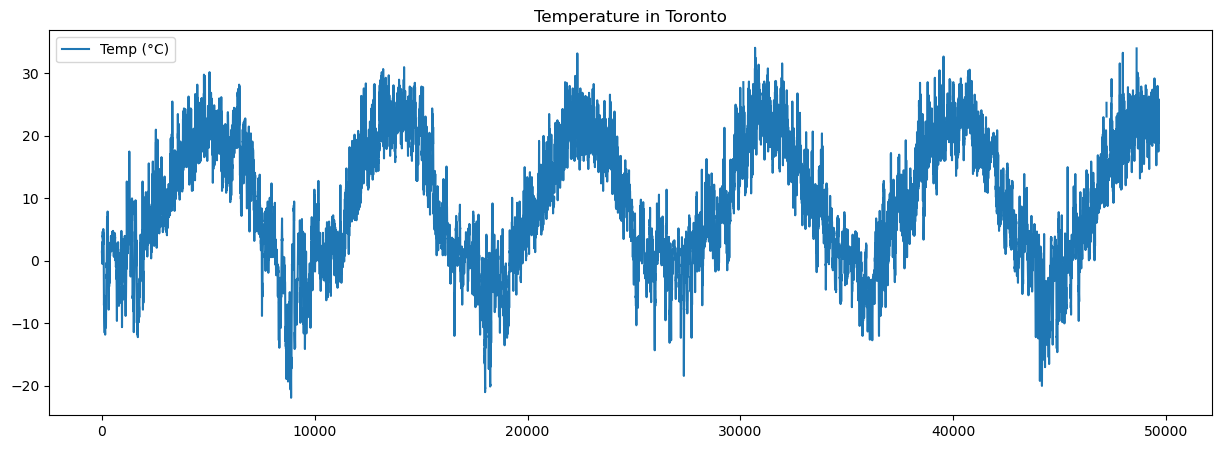

In [107]:
toronto_weather_data.plot(kind='line', y='Temp (°C)', figsize=(15, 5), title='Temperature in Toronto')